In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np

In [2]:
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_no_tol_20/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_mc/" # MC results
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_mc_multi/" # MC/multiprocessig results
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_mc_multi_cuda_0005/" # MC/multiprocessing/0.0005
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_mc_multi_cuda_0008/" # MC/multiprocessing/0.0008
results_dir = "/mnt/fs5/nclkong/information_bottleneck/four_mc_multi_cuda_0005_0310/"

In [3]:
def plot_density_at_epoch(epoch):
    beta = 0.05
    vals = np.load(results_dir + "epoch_{}_outputs.npy".format(epoch))
    print(vals.shape)
    plt.figure()
    x = np.linspace(-1.5,1.5,750)
    plt.plot(
        x,
        mlab.normpdf(x, vals[0], beta)+
        mlab.normpdf(x, vals[1], beta)+
        mlab.normpdf(x, vals[2], beta)+
        mlab.normpdf(x, vals[3], beta)
    )

def plot_hist(epoch):
    vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
    print(vals.shape)
    plt.figure()
    x = np.linspace(-1.5,1.5,750)
    plt.hist(vals, range=[-1.5,1.5], bins=150)
    plt.grid(True)

def plot_hist_over_epochs(epochs):
    num_bins = 100
    for epoch in epochs:
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
        hist, _ = np.histogram(vals, range=[-1.5,1.5], bins=num_bins)
        xmin = np.min(vals)
        xmax = np.max(vals)
        x = np.linspace(xmin, xmax, num_bins)
        plt.plot(x, hist, label="Epoch {}".format(epoch))
        plt.xlim(-1.5,1.5)
        plt.legend()
    plt.grid(True)

def plot_hist_top_view(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch+1))
        hist, bins = np.histogram(vals, range=[-1.5,1.5], bins=num_bins)
        total_points = np.sum(hist)
        assert total_points == points
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1

        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epochs")
    plt.ylabel(r"PDF of $T_1(k)$")

def plot_acc():
    vals = np.load(results_dir + "accuracies.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    
def plot_mutual_info():
    vals = np.load(results_dir + "mutual_information.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.ylabel("Mutual Information")
    plt.xlabel("Epoch")
    plt.grid(True)

(1000, 1)


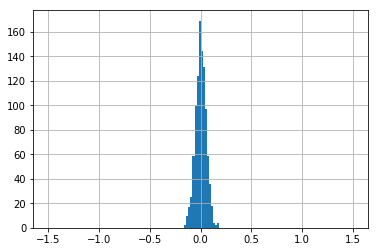

In [4]:
plot_hist(1)

(1000, 1)


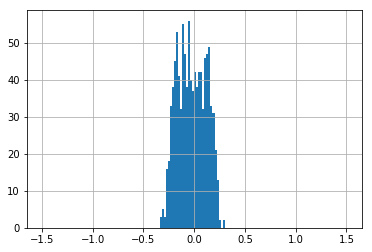

In [5]:
plot_hist(5)

(1000, 1)


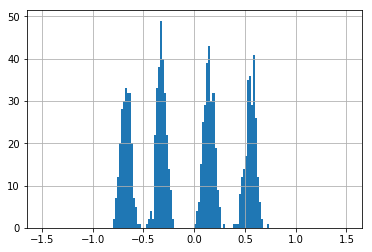

In [6]:
plot_hist(10)

(1000, 1)


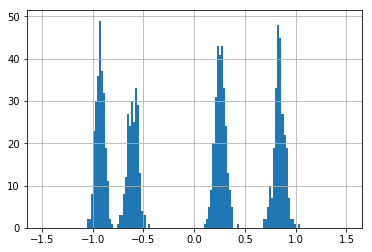

In [7]:
plot_hist(15)

(1000, 1)


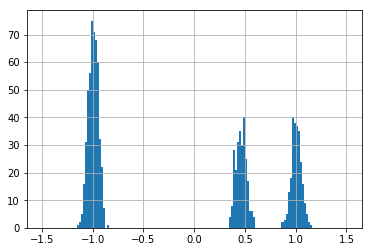

In [8]:
plot_hist(50)

(1000, 1)


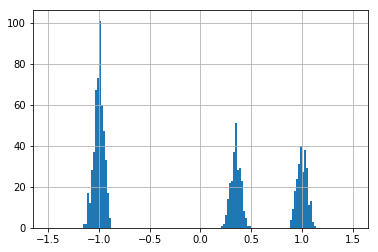

In [9]:
plot_hist(60)

(1000, 1)


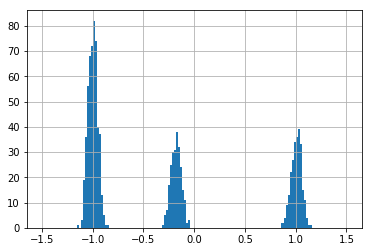

In [10]:
plot_hist(80)

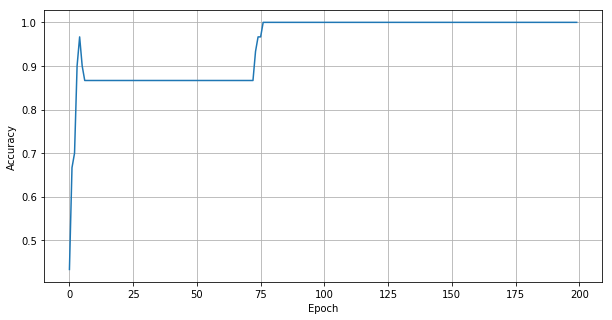

In [11]:
plot_acc()

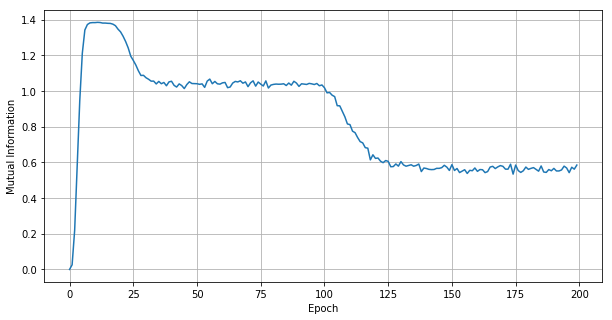

In [12]:
plot_mutual_info()
plt.savefig("/home/nclkong/information_bottleneck/figures/mi_4.png")

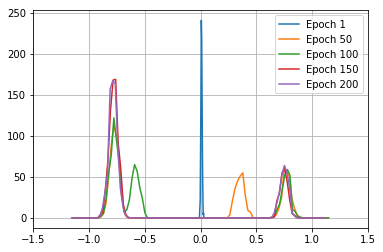

In [13]:
# plot_hist_over_epochs(np.arange(5)+1)
plot_hist_over_epochs([1,50,100,150,200])

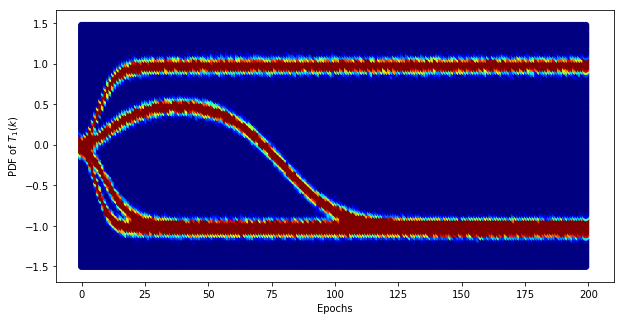

In [14]:
plot_hist_top_view(200)
plt.savefig("/home/nclkong/information_bottleneck/figures/pdf_4.png")